In [2]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Import data
data = pd.read_csv('data/cleaned_data.csv')

In [4]:
# Negative tweet dataframe
neg_data = data.loc[data['emotion'] == 'Negative emotion']

# Positive tweet dataframe
pos_data = data.loc[data['emotion'] == 'Positive emotion']

# Neutral tweet dataframe
no_emo_data = data.loc[data['emotion'] == 'No emotion toward brand or product']

In [5]:
# Function to display Most frequent words and plot them
def most_freq_words(data):
    data_token = data['tweet'].apply(word_tokenize)
    
#   Removes stop words
    stop = stopwords.words('english')
#   Added more words to the stopwords list
    stop.extend(['sxsw', 'iphone', 'google', 'ipad', 'apple', 'mention', 'rt', 'link', 'app', 'store'])
#   Tokenize the data
    data_token = data_token.apply(lambda x: [item for item in x if item not in stop])

#   Make one list of words form all tweets
    tweet = []
    for t in data_token:
        tweet.extend(t)

#   Lemmatize the words
    lemmatized=[]
    for w in tweet:
        lemmatized.append(lemmatizer.lemmatize(w))

    fdist = FreqDist(lemmatized)
    
    return plt.figure(figsize=(10,10)), fdist.plot(30), fdist.most_common(25) 

In [6]:
# Function to normalize the data
def normalized(data):
    data_token = data['tweet'].apply(word_tokenize)

    stop = stopwords.words('english')
    stop.extend(['sxsw', 'iphone', 'google', 'ipad', 'apple', 'mention', 'rt', 'link', 'app', 'store'])
    data_token = data_token.apply(lambda x: [item for item in x if item not in stop])

    tweet = []
    for t in data_token:
        tweet.extend(t)

    lemmatized=[]
    for w in tweet:
        lemmatized.append(lemmatizer.lemmatize(w))

    fdist = FreqDist(lemmatized)
    
    total_word_count = sum(fdist.values())
    top_25 = fdist.most_common(25)
    print("Word \t\t Normalized Frequency")
    print()
    for word in top_25:
        normalized_frequency = word[1]/total_word_count
        print("{} \t\t {:.4}".format(word[0], normalized_frequency))

# Plot Word Frequency

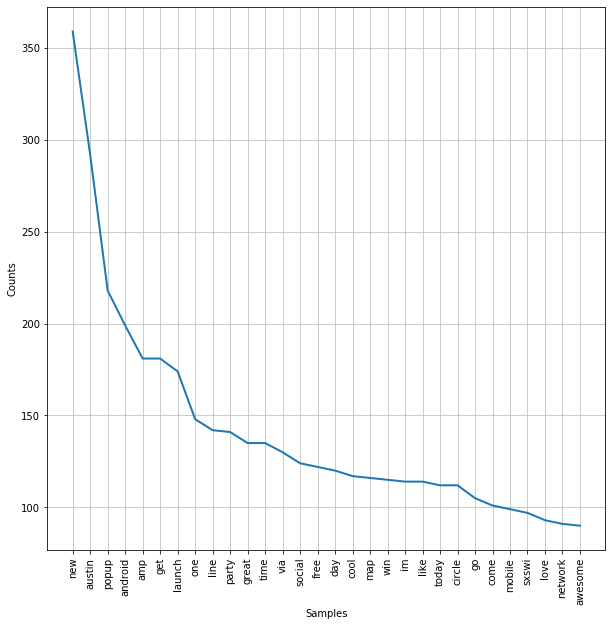

(<Figure size 720x720 with 1 Axes>,
 [('new', 359),
  ('austin', 292),
  ('popup', 218),
  ('android', 199),
  ('amp', 181),
  ('get', 181),
  ('launch', 174),
  ('one', 148),
  ('line', 142),
  ('party', 141),
  ('great', 135),
  ('time', 135),
  ('via', 130),
  ('social', 124),
  ('free', 122),
  ('day', 120),
  ('cool', 117),
  ('map', 116),
  ('win', 115),
  ('im', 114),
  ('like', 114),
  ('today', 112),
  ('circle', 112),
  ('go', 105),
  ('come', 101)])

In [7]:
# Running most frequent words function on Positive words data
most_freq_words(pos_data)

In [8]:
# Running normalize function on Positive words data
normalized(pos_data)

Word 		 Normalized Frequency

new 		 0.0146
austin 		 0.01188
popup 		 0.008869
android 		 0.008096
amp 		 0.007363
get 		 0.007363
launch 		 0.007079
one 		 0.006021
line 		 0.005777
party 		 0.005736
great 		 0.005492
time 		 0.005492
via 		 0.005289
social 		 0.005045
free 		 0.004963
day 		 0.004882
cool 		 0.00476
map 		 0.004719
win 		 0.004678
im 		 0.004638
like 		 0.004638
today 		 0.004556
circle 		 0.004556
go 		 0.004272
come 		 0.004109


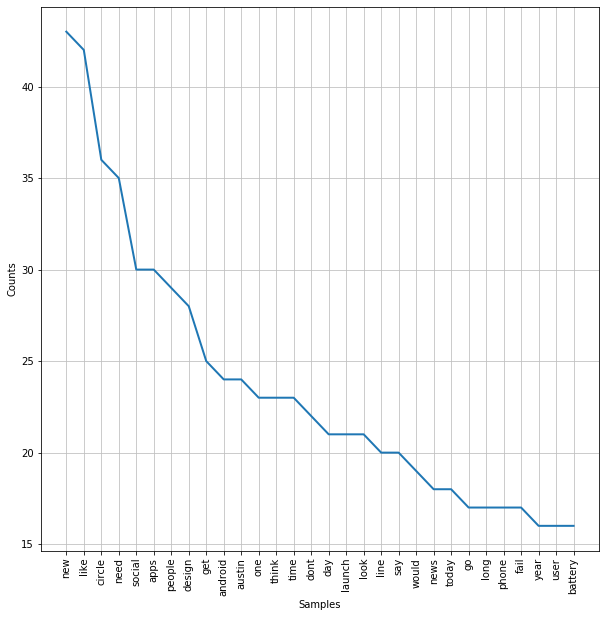

(<Figure size 720x720 with 1 Axes>,
 [('new', 43),
  ('like', 42),
  ('circle', 36),
  ('need', 35),
  ('social', 30),
  ('apps', 30),
  ('people', 29),
  ('design', 28),
  ('get', 25),
  ('android', 24),
  ('austin', 24),
  ('one', 23),
  ('think', 23),
  ('time', 23),
  ('dont', 22),
  ('day', 21),
  ('launch', 21),
  ('look', 21),
  ('line', 20),
  ('say', 20),
  ('would', 19),
  ('news', 18),
  ('today', 18),
  ('go', 17),
  ('long', 17)])

In [9]:
# Running most frequent words function on Negative words data
most_freq_words(neg_data)

In [10]:
# Running normalize function on Negative words data
normalized(neg_data)

Word 		 Normalized Frequency

new 		 0.00847
like 		 0.008273
circle 		 0.007091
need 		 0.006894
social 		 0.005909
apps 		 0.005909
people 		 0.005712
design 		 0.005515
get 		 0.004924
android 		 0.004727
austin 		 0.004727
one 		 0.00453
think 		 0.00453
time 		 0.00453
dont 		 0.004333
day 		 0.004136
launch 		 0.004136
look 		 0.004136
line 		 0.003939
say 		 0.003939
would 		 0.003742
news 		 0.003545
today 		 0.003545
go 		 0.003348
long 		 0.003348


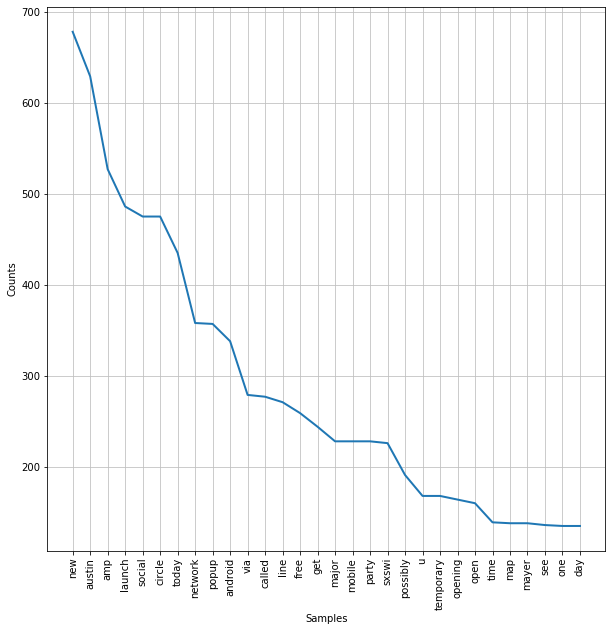

(<Figure size 720x720 with 1 Axes>,
 [('new', 678),
  ('austin', 629),
  ('amp', 527),
  ('launch', 486),
  ('social', 475),
  ('circle', 475),
  ('today', 435),
  ('network', 358),
  ('popup', 357),
  ('android', 338),
  ('via', 279),
  ('called', 277),
  ('line', 271),
  ('free', 259),
  ('get', 244),
  ('major', 228),
  ('mobile', 228),
  ('party', 228),
  ('sxswi', 226),
  ('possibly', 191),
  ('u', 168),
  ('temporary', 168),
  ('opening', 164),
  ('open', 160),
  ('time', 139)])

In [11]:
# Running most frequent words function on Neutral words data
most_freq_words(no_emo_data)

In [12]:
# Running normalize function on Neutral words data
normalized(no_emo_data)

Word 		 Normalized Frequency

new 		 0.01551
austin 		 0.01439
amp 		 0.01206
launch 		 0.01112
social 		 0.01087
circle 		 0.01087
today 		 0.009954
network 		 0.008192
popup 		 0.008169
android 		 0.007734
via 		 0.006384
called 		 0.006338
line 		 0.006201
free 		 0.005926
get 		 0.005583
major 		 0.005217
mobile 		 0.005217
party 		 0.005217
sxswi 		 0.005171
possibly 		 0.00437
u 		 0.003844
temporary 		 0.003844
opening 		 0.003753
open 		 0.003661
time 		 0.003181


# Visualize

In [13]:
# Define function to output frequent words
def most_freq_words_saved(data):
    data_token = data['tweet'].apply(word_tokenize)

    stop = stopwords.words('english')
    stop.extend(['sxsw', 'iphone', 'google', 'ipad', 'apple', 'mention', 'rt', 'link', 'app', 'store'])
    data_token = data_token.apply(lambda x: [item for item in x if item not in stop])

    tweet = []
    for t in data_token:
        tweet.extend(t)

    lemmatized=[]
    for w in tweet:
        lemmatized.append(lemmatizer.lemmatize(w))

    fdist = FreqDist(lemmatized)
    
    return fdist

In [14]:
# Save the output of frequent words as variables
pos_words = most_freq_words_saved(pos_data)
neg_words = most_freq_words_saved(neg_data)
neu_words = most_freq_words_saved(no_emo_data)

In [15]:
# Create counts of positive, negative, and neutral with values and words
pos_data_counts = [x[1] for x in pos_words.most_common(25)]
pos_data_words = [x[0] for x in pos_words.most_common(25)]

neg_data_counts = [x[1] for x in neg_words.most_common(25)]
neg_data_words = [x[0] for x in neg_words.most_common(25)]

neu_words_counts = [x[1] for x in neu_words.most_common(25)]
neu_words_words = [x[0] for x in neu_words.most_common(25)]

In [16]:
# Set the color of the bar graphs
color = cm.viridis_r(np.linspace(.4,.8, 30))

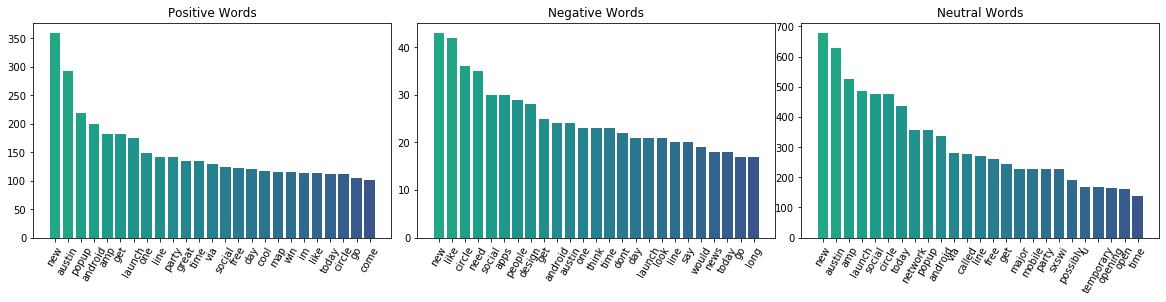

In [17]:
# Plot above data on bar graphs 
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(131)
ax2 = new_figure.add_subplot(132)
ax3 = new_figure.add_subplot(133)

ax.bar(pos_data_words, pos_data_counts, color=color)

ax2.bar(neg_data_words, neg_data_counts, color=color)

ax3.bar(neu_words_words, neu_words_counts, color=color)

ax.title.set_text('Positive Words')
ax2.title.set_text('Negative Words')
ax3.title.set_text('Neutral Words')

for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

# Save the graph
plt.savefig('figures/word count bar graphs.png')

plt.show()

In [21]:
!pip install wordcloud
# Create dictionaries of the data
from wordcloud import WordCloud
pos_dictionary = dict(zip(pos_data_words, pos_data_counts))
neg_dictionary = dict(zip(neg_data_words, neg_data_counts))
neu_dictionary = dict(zip(neu_words_words, neu_words_counts))

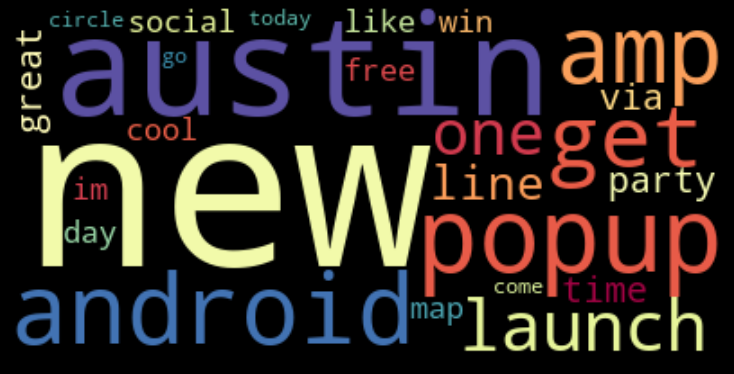

In [22]:
# Plotting words cloud of positive words
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(pos_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig('figures/positive_wordcloud.png')

plt.show()

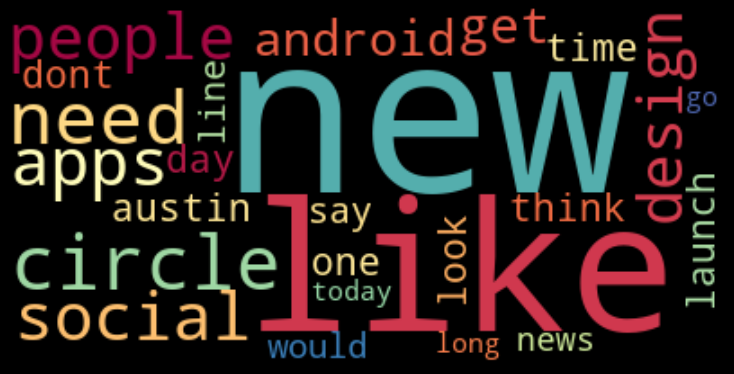

In [23]:
# Plotting words cloud of negative words
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(neg_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig('figures/negative_wordcloud.png')

plt.show()

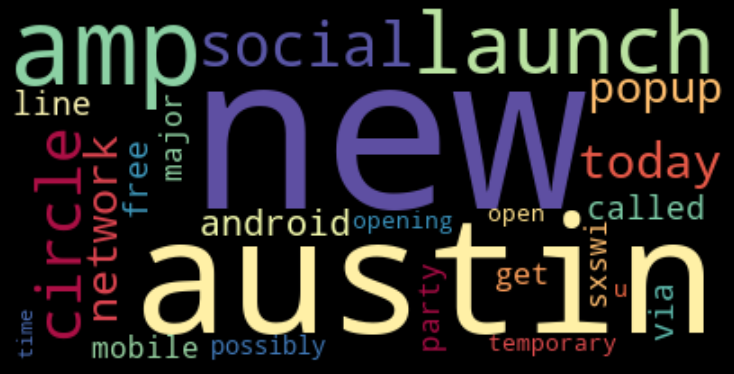

In [24]:
# Plotting words cloud of neutral words
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(neu_dictionary)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.savefig('figures/neutral_wordcloud.png')

plt.show()